In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

import pytz
import pysolar as solar

import gc

# calculate solar data

In [2]:
tz=pytz.timezone('Europe/Berlin')
#tz=pytz.UTC

In [3]:
lat=47
lon=11

tz=pytz.timezone('Europe/Berlin')

dts = pd.date_range(datetime(2017,1,1),datetime(2018,1,1),freq='15min',tz=tz)
dts

DatetimeIndex(['2017-01-01 00:00:00+01:00', '2017-01-01 00:15:00+01:00',
               '2017-01-01 00:30:00+01:00', '2017-01-01 00:45:00+01:00',
               '2017-01-01 01:00:00+01:00', '2017-01-01 01:15:00+01:00',
               '2017-01-01 01:30:00+01:00', '2017-01-01 01:45:00+01:00',
               '2017-01-01 02:00:00+01:00', '2017-01-01 02:15:00+01:00',
               ...
               '2017-12-31 21:45:00+01:00', '2017-12-31 22:00:00+01:00',
               '2017-12-31 22:15:00+01:00', '2017-12-31 22:30:00+01:00',
               '2017-12-31 22:45:00+01:00', '2017-12-31 23:00:00+01:00',
               '2017-12-31 23:15:00+01:00', '2017-12-31 23:30:00+01:00',
               '2017-12-31 23:45:00+01:00', '2018-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=35041, freq='15T')

In [4]:
eles = [solar.solar.get_altitude(lat,lon,dt.to_pydatetime()) for dt in dts]

In [5]:
# into dataframe for e.g. better indexing
df = pd.DataFrame(eles, index=dts, columns=['ele'])
uts = [d.hour+d.minute/60 for d in df.index]
df['ut'] = uts
df.head()

,ele,ut
2017-01-01 00:00:00+01:00,-65.688599,0.00
2017-01-01 00:15:00+01:00,-65.986151,0.25
2017-01-01 00:30:00+01:00,-65.907428,0.50
2017-01-01 00:45:00+01:00,-65.456153,0.75
2017-01-01 01:00:00+01:00,-64.651657,1.00


In [6]:
# list of days to loop over
dates = np.unique(df.index.date)

# start plotting

In [7]:
def set_style():
    '''
    set plotting style

    '''
    fbg='1'#figure bg
    afc = '.96'#axes face color

    plt.rcParams['legend.frameon'] = False
    plt.rcParams['xtick.major.size'] = 0
    plt.rcParams['ytick.major.size'] = 0
    plt.rcParams['axes.grid'] = True

    plt.rcParams['grid.color'] = '.99'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 2

    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['figure.facecolor'] = fbg
    #axes background color
        
    plt.rcParams['axes.facecolor'] = afc
    plt.rcParams['axes.edgecolor'] = afc
    
    tc='.16'
    plt.rcParams['axes.labelcolor'] = tc
    plt.rcParams['axes.labelpad'] = '1'
    plt.rcParams['xtick.color'] = tc
    plt.rcParams['ytick.color'] = tc
    plt.rcParams['text.color'] = tc
    plt.rcParams['xtick.major.pad'] = 3
    plt.rcParams['ytick.major.pad'] = 3

    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['xtick.labelsize'] = 10

    plt.rcParams['font.size'] = 10
    plt.rcParams['legend.fontsize'] = 10

    plt.rcParams['lines.markeredgewidth'] = 0

set_style()

In [8]:
#prototyping

fig = plt.figure(figsize=(10,10))

ax = fig.add_axes([0,0,.2,.1])
#ax.plot(df[df['ele']>0].loc['2020-12-1'],'.-')

ax.fill_between(df[df['ele']>0].loc['2017-12-1']['ut'],df[df['ele']>0].loc['2017-12-30]['ele'])

ax.set_xlim(0,23)
ax.set_ylim(0,70)

SyntaxError: unterminated string literal (detected at line 8) (3965141874.py, line 8)

In [9]:
def plot_clock(ax,x0,y0,r0,dt):
    '''
    plot a little analog clock
    '''
    angle_hour = np.pi/180*(360*dt.hour/12.)
    angle_minute = np.pi/180*(360*dt.minute/60.)
    angle_hour +=angle_minute/12.

    c2 = plt.Circle((x0,y0),r0, fc='none',ec='.2',transform=ax.transAxes)

    r_h=r0*.5
    r_m=r0*.9
    x_hour,y_hour = r_h*np.sin(angle_hour),r_h*np.cos(angle_hour)
    x_minute,y_minute = r_m*np.sin(angle_minute),r_m*np.cos(angle_minute)
    l_h=plt.Line2D((x0,x0+x_hour),(y0,y0+y_hour),c='.2',lw=3,transform=ax.transAxes)
    l_m=plt.Line2D((x0,x0+x_minute),(y0,y0+y_minute),c='.2',lw=1,transform=ax.transAxes)


    ax.add_artist(c2)
    ax.add_artist(l_h)
    ax.add_artist(l_m)
    
    
def plot_1day(ax,df,dt):
    '''
    plot one day
    '''
    d_str = dt.strftime("%Y-%m-%d")
    
    #plot reduces only?
    df_d = df.loc[d_str]#[::5]
    df_d_e = df_d[df_d['ele']>0]
    
    b_colors = [cm(int(i)) for i in 20*df_d_e['ele'].values/70.]
    #bars with width bw, should be slightly longer than interval
    bw = 16
    ax.bar(df_d_e['ut'],df_d_e['ele'],width=bw/60.,
           align='center',color=b_colors,rasterized=True)

    ax.set_xticks(np.arange(6,24,6))
    ax.set_xlim(2,22)
    #ax.set_ylim(0,70)
    ax.set_ylim(0,65)
    
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    ax.grid(True)
    
    # little clocks to denote sunrise/set - would actually need df interval >2min
    df2 = df.loc[d_str]
        
    dt_up,dt_down = df2[df2['ele']>0].index[0],df2[df2['ele']>0].index[-1]
    plot_clock(ax,.9,.9,.09,dt_down)
    plot_clock(ax,.1,.9,.09,dt_up)

In [10]:
cm = plt.cm.get_cmap('Blues_r',20)
#cm = plt.cm.get_cmap('YlGnBu_r',20)
#cm = plt.cm.get_cmap('afmhot',20)

2017-12-31


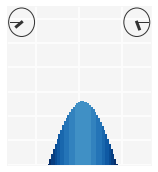

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes([0,0,.2,.22])

dt = dates[-2]
print(dt)
plot_1day(ax,df,datetime(2017,2,1))

In [13]:
plt.close("all")
fig.clf()
plt.close(fig)
gc.collect()

3294

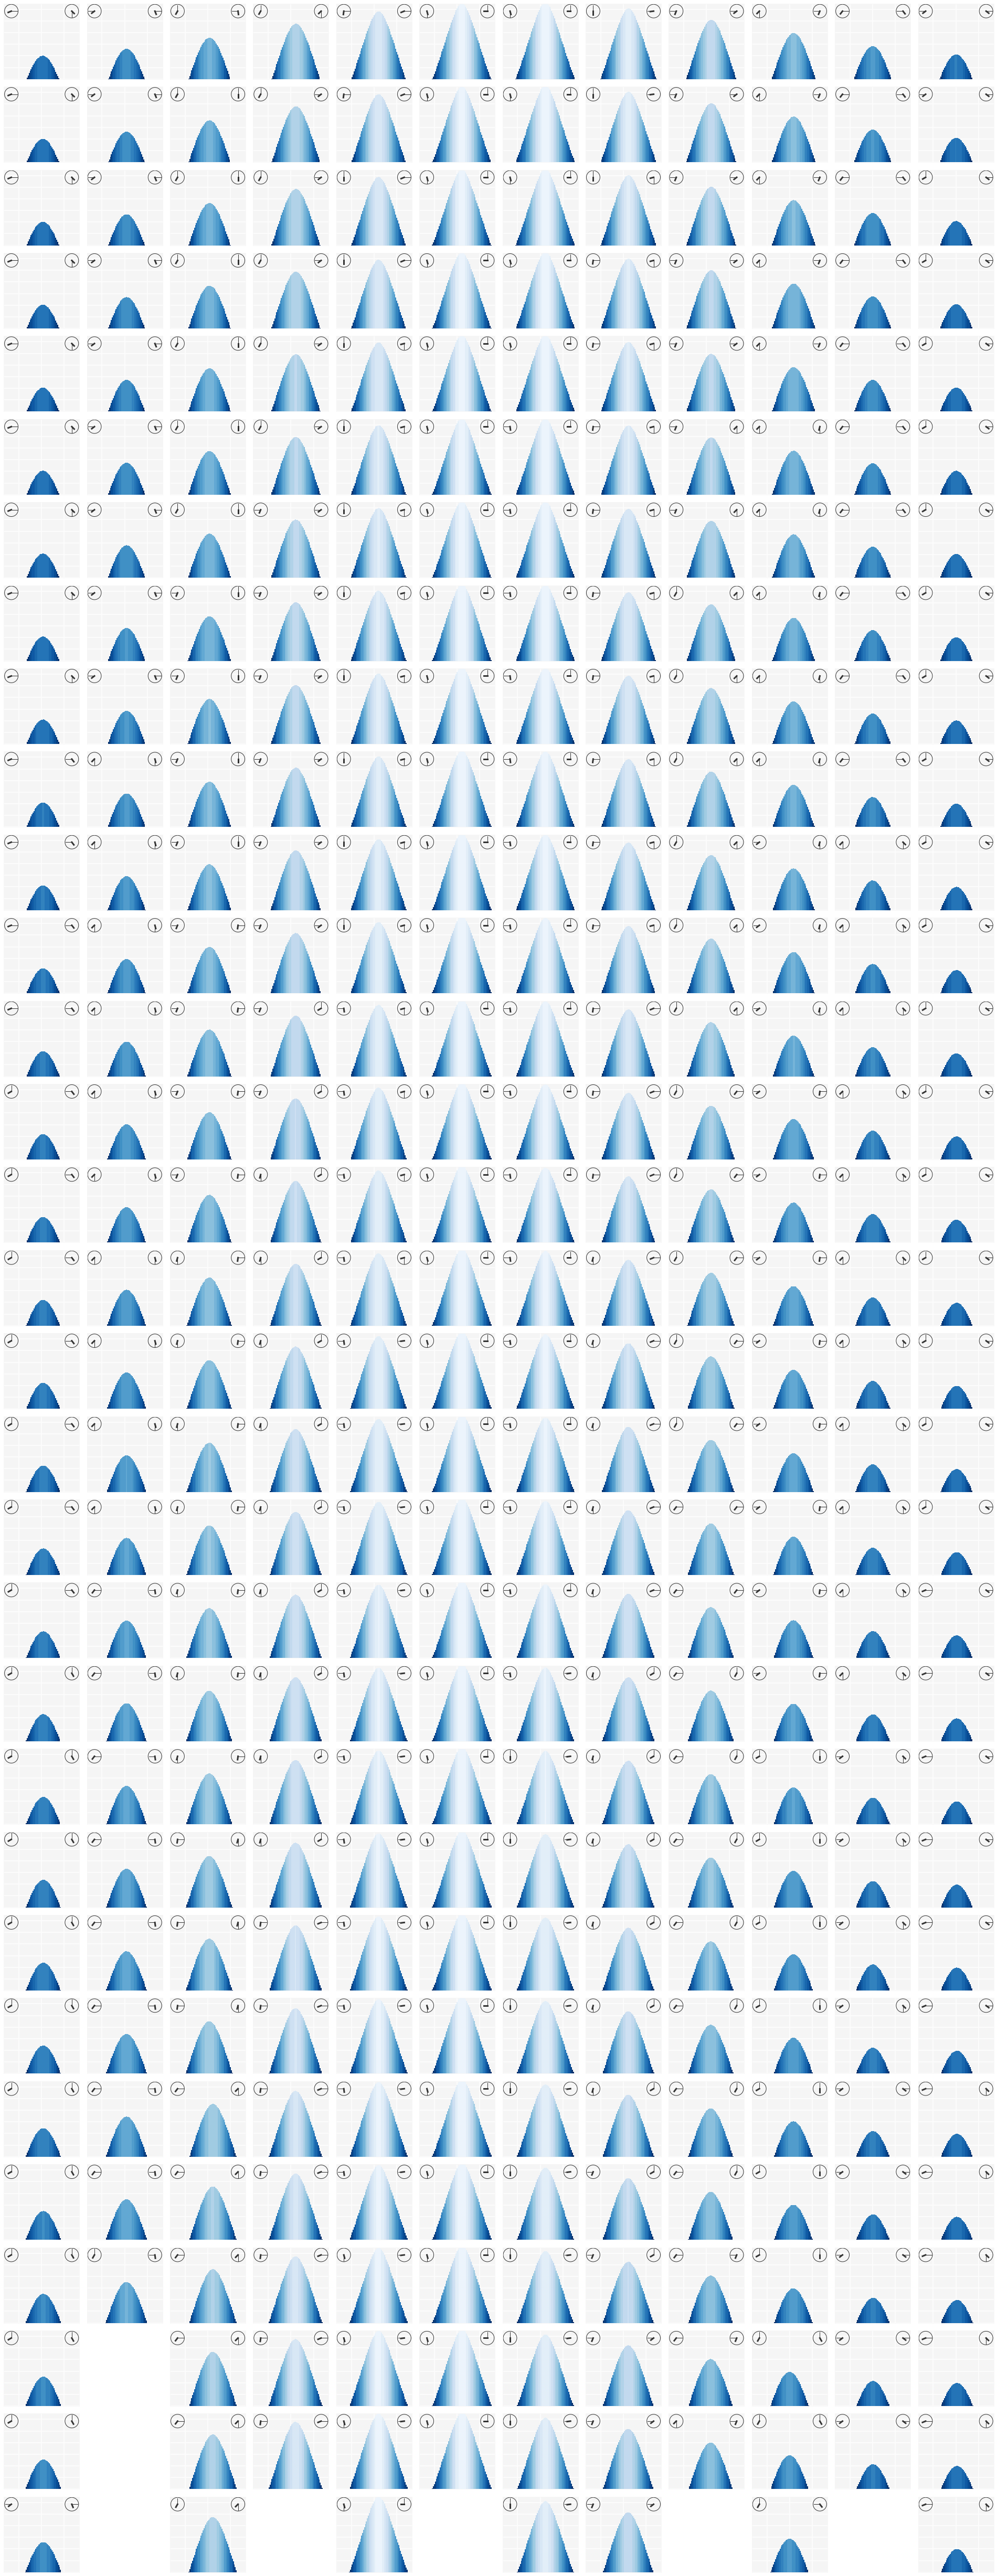

In [14]:
# final figure, looping over all days
fig = plt.figure(figsize=(10,10))

w=.2
h=.2
dh=.02
dw=.02
ncols=30

k=0

for dt in dates[:-1]:
#for dt in dates[0:70]:
    print(dt,end='\r')
    #r,c = dt.month,dt.day #left-right
    r,c = dt.day,dt.month #top-bottom
    
    ax = fig.add_axes([(w+dw)*c,-(h+dh)*r,w,h])
    plot_1day(ax,df,dt)
    k+=1
